In [4]:
import os 
from matplotlib import pyplot as plt
from natsort import natsorted

In [5]:
ROOT_DIR = "../../output/20240811_v2_repeat2/val_unslpash-trainset/1.0/no_consistnacy"

plot_id:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] losses:  [0.12040677533691956, 0.12041248878360622, 0.1203582505747262, 0.12039967366080317, 0.12038122873442868, 0.12039464661955006, 0.1203821953644769, 0.12036929997718997, 0.12040928216237161, 0.12041526345225671, 0.12039926179374258, 0.12037520365168651, 0.12037643734365702, 0.12038640190536777, 0.12039562777305643, 0.12040464597133299, 0.12038307723899683, 0.12034323966234095, 0.1203387875834273, 0.12033254091058754, 0.12038017893727455, 0.12036724481214252, 0.12033361296635121, 0.12032833102210942, 0.12037633152212948, 0.12034082879933218, 0.1203687621642732, 0.12035829111830228, 0.12036145119410423, 0.12035264330398705]
min_loss_id:  23
min_loss:  0.12032833102210942
min_plot_id:  24


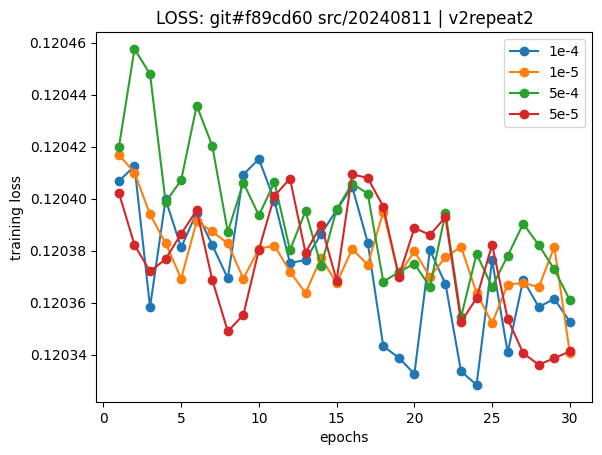

In [6]:
LRs = natsorted(os.listdir(ROOT_DIR))  
for lr in LRs:
    #checkpoints = natsorted(os.listdir(os.path.join(ROOT_DIR, lr)))
    checkpoints = ["chk{}".format(i) for i in range(1,31)]
    checkpoint_id = []
    avg_losses = []
    for checkpoint in checkpoints:
        # read all text files in directory and average to single float
        all_losses = []
        step_root_dir = os.path.join(ROOT_DIR, lr, checkpoint, 'lightning_logs/version_0/train_loss')
        step_dirs = natsorted(os.listdir(step_root_dir))
        for step_id in step_dirs:     
            for file in os.listdir(os.path.join(step_root_dir, step_id)):
                if file.endswith(".txt"):
                    with open(os.path.join(step_root_dir, step_id, file), 'r') as f:
                        all_losses.append(float(f.read()))       
        avg_loss = sum(all_losses) / len(all_losses)
        avg_losses.append(avg_loss)
        checkpoint_id.append(int(checkpoint.replace("chk","")))
    plt.plot(checkpoint_id, avg_losses, 'o-', label=lr)
    if lr == "1e-4":
        print("plot_id: ", checkpoint_id, "losses: ", avg_losses)
        # find the location that has the lowest loss
        min_loss = min(avg_losses)
        min_loss_id = avg_losses.index(min_loss)
        print("min_loss_id: ", min_loss_id)
        print("min_loss: ", min_loss)
        # print min plot_id
        print("min_plot_id: ", checkpoint_id[min_loss_id])
    plt.legend()
    plt.xlabel("epochs")
    plt.ylabel("training loss")
    #plt.title("Training loss average on timesteps [100,200,...,900]")
    plt.title("LOSS: git#f89cd60 src/20240811 | v2repeat2")